# 4 数据表的合并和连接


数据表可以按「键」合并，用 merge 函数；可以按「轴」来连接，用 concat 函数。

## 4.1 合并

按键 (key) 合并可以分「单键合并」和「多键合并」。

### 单键合并

单键合并用 merge 函数，语法如下：

    pd.merge( df1, df2, how=s, on=c )

c 是 df1 和 df2 共有的一栏，合并方式 (how=s) 有四种：

1. 左连接 (left join)：合并之后显示 df1 的所有行
2. 右连接 (right join)：合并之后显示 df2 的所有行
3. 外连接 (outer join)：合并 df1 和 df2 共有的所有行
4. 内连接 (inner join)：合并所有行 (默认情况)


首先创建两个 DataFrame：

* df_price：4 天的价格 (2019-01-01 到 2019-01-04)
* df_volume：5 天的交易量  (2019-01-02 到 2019-01-06)

In [2]:
import pandas as pd

df_price = pd.DataFrame({'Date': pd.date_range('2019-1-1', periods=4),'Adj Close': [24.42, 25.00, 25.25, 25.64]})
df_price


,Date,Adj Close
0,2019-01-01,24.42
1,2019-01-02,25.00
2,2019-01-03,25.25
3,2019-01-04,25.64


In [4]:
df_volume = pd.DataFrame( {'Date': pd.date_range('2019-1-2', periods=5),'Volume' : [56081400, 99455500, 83028700, 100234000, 73829000]})
df_volume

,Date,Volume
0,2019-01-02,56081400
1,2019-01-03,99455500
2,2019-01-04,83028700
3,2019-01-05,100234000
4,2019-01-06,73829000


接下来用 df_price  和 df_volume 展示四种合并

#### left join

In [5]:
pd.merge(df_price, df_volume, how='left')

,Date,Adj Close,Volume
0,2019-01-01,24.42,NaN
1,2019-01-02,25.00,56081400.0
2,2019-01-03,25.25,99455500.0
3,2019-01-04,25.64,83028700.0


按 df_price 里 Date 栏里的值来合并数据

* df_volume 里 Date 栏里没有 2019-01-01，因此 Volume 为 NaN
* df_volume 里 Date 栏里的 2019-01-05 和 2019-01-06 不在 df_price 里 Date 栏，因此丢弃

#### right join

In [6]:
pd.merge(df_price, df_volume, how='right')

,Date,Adj Close,Volume
0,2019-01-02,25.00,56081400
1,2019-01-03,25.25,99455500
2,2019-01-04,25.64,83028700
3,2019-01-05,NaN,100234000
4,2019-01-06,NaN,73829000


按 df_volume 里 Date 栏里的值来合并数据

* df_price 里 Date 栏里没有 2019-01-05 和 2019-01-06，因此 Adj Close 为 NaN
* df_price 里 Date 栏里的 2019-01-01 不在 df_volume 里 Date 栏，因此丢弃

#### outer join

In [7]:
pd.merge(df_price, df_volume, how='outer')

,Date,Adj Close,Volume
0,2019-01-01,24.42,NaN
1,2019-01-02,25.00,56081400.0
2,2019-01-03,25.25,99455500.0
3,2019-01-04,25.64,83028700.0
4,2019-01-05,NaN,100234000.0
5,2019-01-06,NaN,73829000.0


按 df_price 和 df_volume 里 Date 栏里的所有值来合并数据

* df_price 里 Date 栏里没有 2019-01-05 和 2019-01-06，因此 Adj Close 为 NaN
* df_volume 里 Date 栏里没有 2019-01-01，因此 Volume 为 NaN

#### inner join

In [8]:
pd.merge(df_price, df_volume, how='inner') # 默认情况

,Date,Adj Close,Volume
0,2019-01-02,25.00,56081400
1,2019-01-03,25.25,99455500
2,2019-01-04,25.64,83028700


按 df_price 和 df_volume 里 Date 栏里的共有值来合并数据

* df_price 里 Date 栏里的 2019-01-01 不在 df_volume 里 Date 栏，因此丢弃
* df_volume 里 Date 栏里的 2019-01-05 和 2019-01-06 不在 df_price 里 Date 栏，因此丢弃

### 多键合并

多键合并用的语法和单键合并一样，只不过 on=c 中的 c 是多栏。

    pd.merge( df1, df2, how=s, on=c )


首先创建两个 DataFrame：

* portfolio1：3 比产品 FX Option, FX Swap 和 IR Option 的数量
* portfolio2：4 比产品 FX Option (重复名称), FX Swap 和 IR Swap 的数量

In [9]:
porfolio1 = pd.DataFrame({'Asset': ['FX', 'FX', 'IR'], 
                          'Instrument': ['Option', 'Swap', 'Option'], 
                          'Number': [1, 2, 3]})
porfolio1

,Asset,Instrument,Number
0,FX,Option,1
1,FX,Swap,2
2,IR,Option,3


In [10]:
porfolio2 = pd.DataFrame({'Asset': ['FX', 'FX', 'FX', 'IR'], 
                          'Instrument': ['Option', 'Option', 'Swap', 'Swap'], 
                          'Number': [4, 5, 6, 7]})
porfolio2

,Asset,Instrument,Number
0,FX,Option,4
1,FX,Option,5
2,FX,Swap,6
3,IR,Swap,7


在 'Asset' 和 'Instrument' 两个键上做外合并

In [12]:
pd.merge(porfolio1, porfolio2, on=['Asset', 'Instrument'], how='outer')

,Asset,Instrument,Number_x,Number_y
0,FX,Option,1.0,4.0
1,FX,Option,1.0,5.0
2,FX,Swap,2.0,6.0
3,IR,Option,3.0,NaN
4,IR,Swap,NaN,7.0


df1 和 df2 中两个键都有 FX Option 和 FX Swap，因此可以合并它们中 number 那栏。

* df1 中有 IR Option 而 df2 中没有，因此 Number_y 栏下的值为 NaN
* df2 中有 IR Swap 而 df1 中没有，因此 Number_x 栏下的值为 NaN

当 df1 和 df2 有两个相同的列 (Asset 和 Instrument) 时，单单只对一列 (Asset) 做合并产出的 DataFrame 会有另一列 (Instrument) 重复的名称。这时 merge 函数给重复的名称加个后缀 _x, _y 等等。

In [13]:
pd.merge( porfolio1, porfolio2, 
          on='Asset' )

,Asset,Instrument_x,Number_x,Instrument_y,Number_y
0,FX,Option,1,Option,4
1,FX,Option,1,Option,5
2,FX,Option,1,Swap,6
3,FX,Swap,2,Option,4
4,FX,Swap,2,Option,5
5,FX,Swap,2,Swap,6
6,IR,Option,3,Swap,7


当没设定 merge 函数里参数 how 时，默认为 inner (内合并)。在 Asset 列下，df1 有 2 个 FX 和 1 个 IR，df2 有 3 个 FX 和 1 个 IR，内合并完有 8 行 (2×3+1×1)。

如果觉得后缀 _x, _y 没有什么具体含义时，可以设定 suffixes 来改后缀。比如 df1 和 df2 存储的是 portoflio1 和 portfolio2 的产品信息，那么将后缀该成 ‘1’ 和 ‘2’ 更贴切。

In [14]:
pd.merge(porfolio1, porfolio2, on='Asset', suffixes=('1','2'))

,Asset,Instrument1,Number1,Instrument2,Number2
0,FX,Option,1,Option,4
1,FX,Option,1,Option,5
2,FX,Option,1,Swap,6
3,FX,Swap,2,Option,4
4,FX,Swap,2,Option,5
5,FX,Swap,2,Swap,6
6,IR,Option,3,Swap,7


## 4.2 连接
Numpy 数组可相互连接，用 np.concat；同理，Series 也可相互连接，DataFrame 也可相互连接，用 pd.concat。

###  连接 Series
在 concat 函数也可设定参数 axis，

* axis = 0 (默认)，沿着轴 0 (行) 连接，得到一个更长的 Series
* axis = 1，沿着轴 1 (列) 连接，得到一个 DataFrame

被连接的 Series 它们的 index 可以重复 (overlapping)，也可以不同。


#### overlapping index
先定义三个 Series，它们的 index 各不同。

In [15]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

沿着「轴 0」连接得到一个更长的 Series。

In [16]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

沿着「轴 1」连接得到一个 DataFrame。

In [21]:
pd.concat([s1, s2, s3], axis=1, sort="False")

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


#### non-overlapping index
将 s1 和 s3 沿「轴 0」连接来创建 s4，这样 s4 和 s1 的 index 是有重复的。

In [22]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

将 s1 和 s4 沿「轴 1」内连接 (即只连接它们共有 index 对应的值)

In [23]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


#### hierarchical index
最后还可以将 n 个 Series 沿「轴 0」连接起来，再赋予 3 个 keys 创建多层 Series。

In [24]:
pd.concat( [s1, s1, s3], 
           keys=['one','two','three'])

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

### 连接 DataFrame
连接 DataFrame 的逻辑和连接 Series 的一模一样。


#### 沿着行连接 (axis = 0)

先创建两个 DataFrame，df1 和 df2。

In [26]:
import numpy as np

df1 = pd.DataFrame( np.arange(12).reshape(3,4), 
                    columns=['a','b','c','d'])
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [27]:
df2 = pd.DataFrame( np.arange(6).reshape(2,3),
                    columns=['b','d','a'])
df2

,b,d,a
0,0,1,2
1,3,4,5


沿着行连接分两步

* 先把 df1 和 df2 列标签补齐
* 再把 df1 和 df2 纵向连起来

得到的 DataFrame 的 index = [0,1,2,0,1]，有重复值。如果 index 不包含重要信息 (如上例)，可以将 ignore_index 设置为 True，这样就得到默认的 index 值了。

In [29]:
pd.concat( [df1, df2], ignore_index=True ,sort=False)

,a,b,c,d
0,0,1,2.0,3
1,4,5,6.0,7
2,8,9,10.0,11
3,2,0,NaN,1
4,5,3,NaN,4


#### 沿着列连接 (axis = 1)
先创建两个 DataFrame，df1 和 df2。

In [30]:
df1 = pd.DataFrame( np.arange(6).reshape(3,2), 
                    index=['a','b','c'],
                    columns=['one','two'] )
df1

,one,two
a,0,1
b,2,3
c,4,5


In [31]:
df2 = pd.DataFrame( 5 + np.arange(4).reshape(2,2), 
                    index=['a','c'], 
                    columns=['three','four'])
df2

,three,four
a,5,6
c,7,8


沿着列连接分两步

* 先把 df1 和 df2 行标签补齐
* 再把 df1 和 df2 横向连起来

In [32]:

pd.concat( [df1, df2], axis=1 )

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,one,two,three,four
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


# 5 数据表的重塑和透视
重塑 (reshape) 和透视 (pivot) 两个操作只改变数据表的布局 (layout)：

* 重塑用 stack 和 unstack 函数 (互为逆转操作)
* 透视用 pivot 和 melt 函数 (互为逆转操作)

## 5.1 重塑
在〖数据结构之 Pandas (上)〗提到过，DataFrame 和「多层索引的 Series」其实维度是一样，只是展示形式不同。而重塑就是通过改变数据表里面的「行索引」和「列索引」来改变展示形式。

* 列索引 → 行索引，用 stack 函数
* 行索引 → 列索引，用 unstack 函数


### 单层 DataFrame
创建 DataFrame df (1 层行索引，1 层列索引)



In [33]:
symbol = ['JD', 'AAPL']
data = {'行业': ['电商', '科技'],
        '价格': [25.95, 172.97],
        '交易量': [27113291, 18913154]}
df = pd.DataFrame( data, index=symbol )
df.columns.name = '特征'
df.index.name = '代号'
df

特征,行业,价格,交易量
代号,,,
JD,电商,25.95,27113291
AAPL,科技,172.97,18913154


从上表中可知：

* 行索引 = [JD, AAPL]，名称是代号
* 列索引 = [行业, 价格, 交易量]，名称是特征


stack: 列索引 → 行索引

列索引 (特征) 变成了行索引，原来的 DataFrame df 变成了两层 Series (第一层索引是代号，第二层索引是特征)。

In [34]:

c2i_Series = df.stack()
c2i_Series

代号    特征 
JD    行业           电商
      价格        25.95
      交易量    27113291
AAPL  行业           科技
      价格       172.97
      交易量    18913154
dtype: object

思考：变成行索引的特征和原来行索引的代号之间的层次是怎么决定的？好像特征更靠内一点，代号更靠外一点。

#### unstack: 行索引 → 列索引

行索引 (代号) 变成了列索引，原来的 DataFrame df 也变成了两层 Series (第一层索引是特征，第二层索引是代号)。


In [35]:

i2c_Series = df.unstack()
i2c_Series

特征   代号  
行业   JD            电商
     AAPL          科技
价格   JD         25.95
     AAPL      172.97
交易量  JD      27113291
     AAPL    18913154
dtype: object

思考：变成列索引的特征和原来列索引的代号之间的层次是怎么决定的？这时好像代号更靠内一点，特征更靠外一点。

#### *规律总结
对 df 做 stack 和 unstack 都得到了「两层 Series」，但是索引的层次不同，那么在背后的规律是什么？首先我们先来看看两个「两层 Series」的 index 包含哪些信息 (以及 df 的 index 和 columns)。

In [36]:

df.index, df.columns

(Index(['JD', 'AAPL'], dtype='object', name='代号'),
 Index(['行业', '价格', '交易量'], dtype='object', name='特征'))

In [37]:
c2i_Series.index

MultiIndex(levels=[['JD', 'AAPL'], ['行业', '价格', '交易量']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['代号', '特征'])

In [38]:
i2c_Series.index

MultiIndex(levels=[['行业', '价格', '交易量'], ['JD', 'AAPL']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['特征', '代号'])

定义

* r = [JD, AAPL]，名称是代号
* c = [行业, 价格, 交易量]，名称是特征

那么

* df 的行索引 = r
* df 的列索引 = c
* c2i_Series 的索引 = [r, c]
* i2c_Series 的索引 = [c, r]

现在可以总结规律：

* 当用 stack 将 df 变成 c2i_Series 时，df 的列索引 c 加在其行索引 r 后面得到 [r, c] 做为 c2i_Series 的多层索引

* 当用 unstack 将 df 变成 i2c_Series 时，df 的行索引 r 加在其列索引 c 后面得到 [c, r] 做为 i2c_Series 的多层索引


#### 基于层和名称来 unstack
对于多层索引的 Series，unstack 哪一层有两种方法来确定：

* 基于层 (level-based)
* 基于名称 (name-based)

拿 c2i_Series 举例 (读者也可以尝试 i2c_Series)：

1. 基于层来 unstack() 时，没有填层数，默认为最后一层。

In [39]:
c2i_Series.unstack()

特征,行业,价格,交易量
代号,,,
JD,电商,25.95,27113291
AAPL,科技,172.97,18913154


c2i_Series 的最后一层 (看上面它的 MultiIndex) 就是 [行业, 价格, 交易量]，从行索引转成列索引得到上面的 DataFrame。

2. 基于层来 unstack() 时，选择第一层 (参数放 0)

In [41]:

c2i_Series.unstack(0)

代号,JD,AAPL
特征,,
行业,电商,科技
价格,25.95,172.97
交易量,27113291,18913154


c2i_Series 的第一层 (看上面它的 MultiIndex) 就是 [JD, AAPL]，从行索引转成列索引得到上面的 DataFrame。

3. 基于名称来 unstack 

In [42]:
c2i_Series.unstack('代号')

代号,JD,AAPL
特征,,
行业,电商,科技
价格,25.95,172.97
交易量,27113291,18913154


c2i_Series 的代号层 (看上面它的 MultiIndex) 就是 [JD, AAPL]，从行索引转成列索引得到上面的 DataFrame。


## 5.2 透视
数据源表通常只包含行和列，那么经常有重复值出现在各列下，因而导致源表不能传递有价值的信息。这时可用「透视」方法调整源表的布局用作更清晰的展示。

「透视」得到的数据表和 Excel 里面的透视表 (pivot table) 是一样的。透视表是用来汇总其它表的数据：

1. 首先把源表分组，将不同值当做行 (row)、列 (column) 和值 (value)
2. 然后对各组内数据做汇总操作如排序、平均、累加、计数等

这种动态将·「源表」得到想要「终表」的旋转 (pivoting) 过程，使透视表得以命名。

在 Pandas 里透视的方法有两种：

* 用 pivot 函数将「一张长表」变「多张宽表」，
* 用 melt 函数将「多张宽表」变「一张长表」，



# 6 数据表的分组和整合
DataFrame 中的数据可以根据某些规则分组，然后在每组的数据上计算出不同统计量。这种操作称之为 split-apply-combine，

## 6.1 数据


## 6.2 分组 (grouping)
用某一特定标签 (label) 将数据 (data) 分组的语法如下：

    data.groupBy( label )


又要提起那句说了无数遍的话「万物皆对象」了。这个 grouped 也不例外，当你对如果使用某个对象感到迷茫时，用 dir() 来查看它的「属性」和「内置方法」。以下几个属性和方法是我们感兴趣的：

* ngroups: 组的个数 (int)
* size(): 每组元素的个数 (Series)
* groups: 每组元素在原 DataFrame 中的索引信息 (dict)
* get_groups(label): 标签 label 对应的数据 (DataFrame)

### 多标签分组

groupBy 函数除了支持单标签分组，也支持多标签分组 (将标签放入一个列表中)。

## 6.3 整合 (aggregating)

做完分组之后 so what？当然是在每组做点数据分析再整合啦。

一个最简单的例子就是上节提到的 size() 函数，用 grouped 对象 (上面根据 Symbol 分组得到的) 来举例。

    grouped.size()

除了上述方法，整合还可以用内置函数 aggregate() 或 agg() 作用到「组对象」上。


### 6.4 split-apply-combine
前几节做的事情的实质就是一个 split-apply-combine 的过程
该 split-apply-combine 过程有三步：

* 根据 key 来 split 成 n 组
* 将函数 apply 到每个组
* 把 n 组的结果 combine 起来



### Apply 函数

在 split-apply-combine 过程中，apply 是核心。Python 本身有高阶函数 apply() 来实现它，既然是高阶函数，参数可以是另外的函数了，比如刚定义好的 top()。

将 top() 函数 apply 到按 Symbol 分的每个组上，按每个 Symbol 打印出来了 Volume 栏下的 5 个最大值。

# 7 总结
【合并数据表】用 merge 函数按数据表的共有列进行左/右/内/外合并。
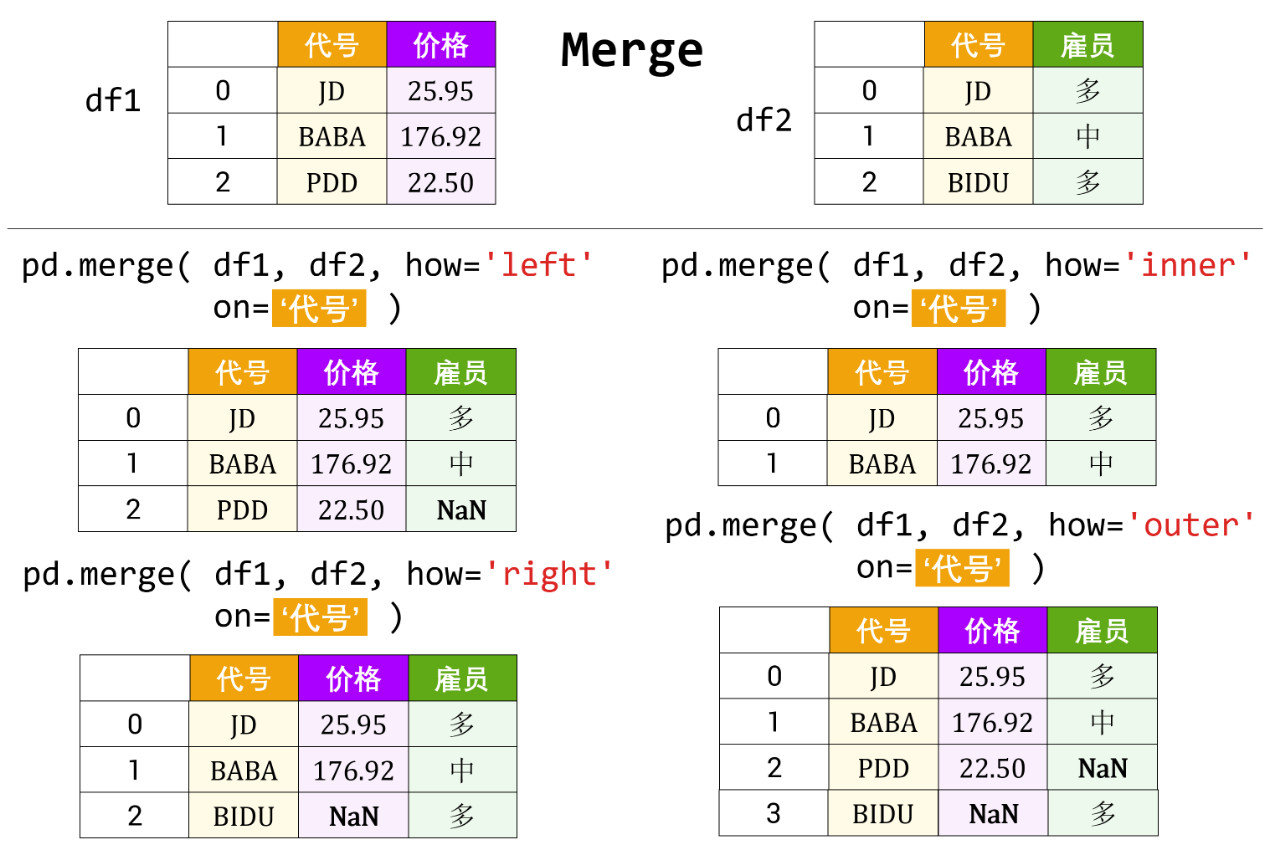


【连接数据表】用 concat 函数对 Series 和 DataFrame 沿着不同轴连接。

【重塑数据表】用 stack 函数将「列索引」变成「行索引」，用 unstack 函数将「行索引」变成「列索引」。它们只是改变数据表的布局和展示方式而已。

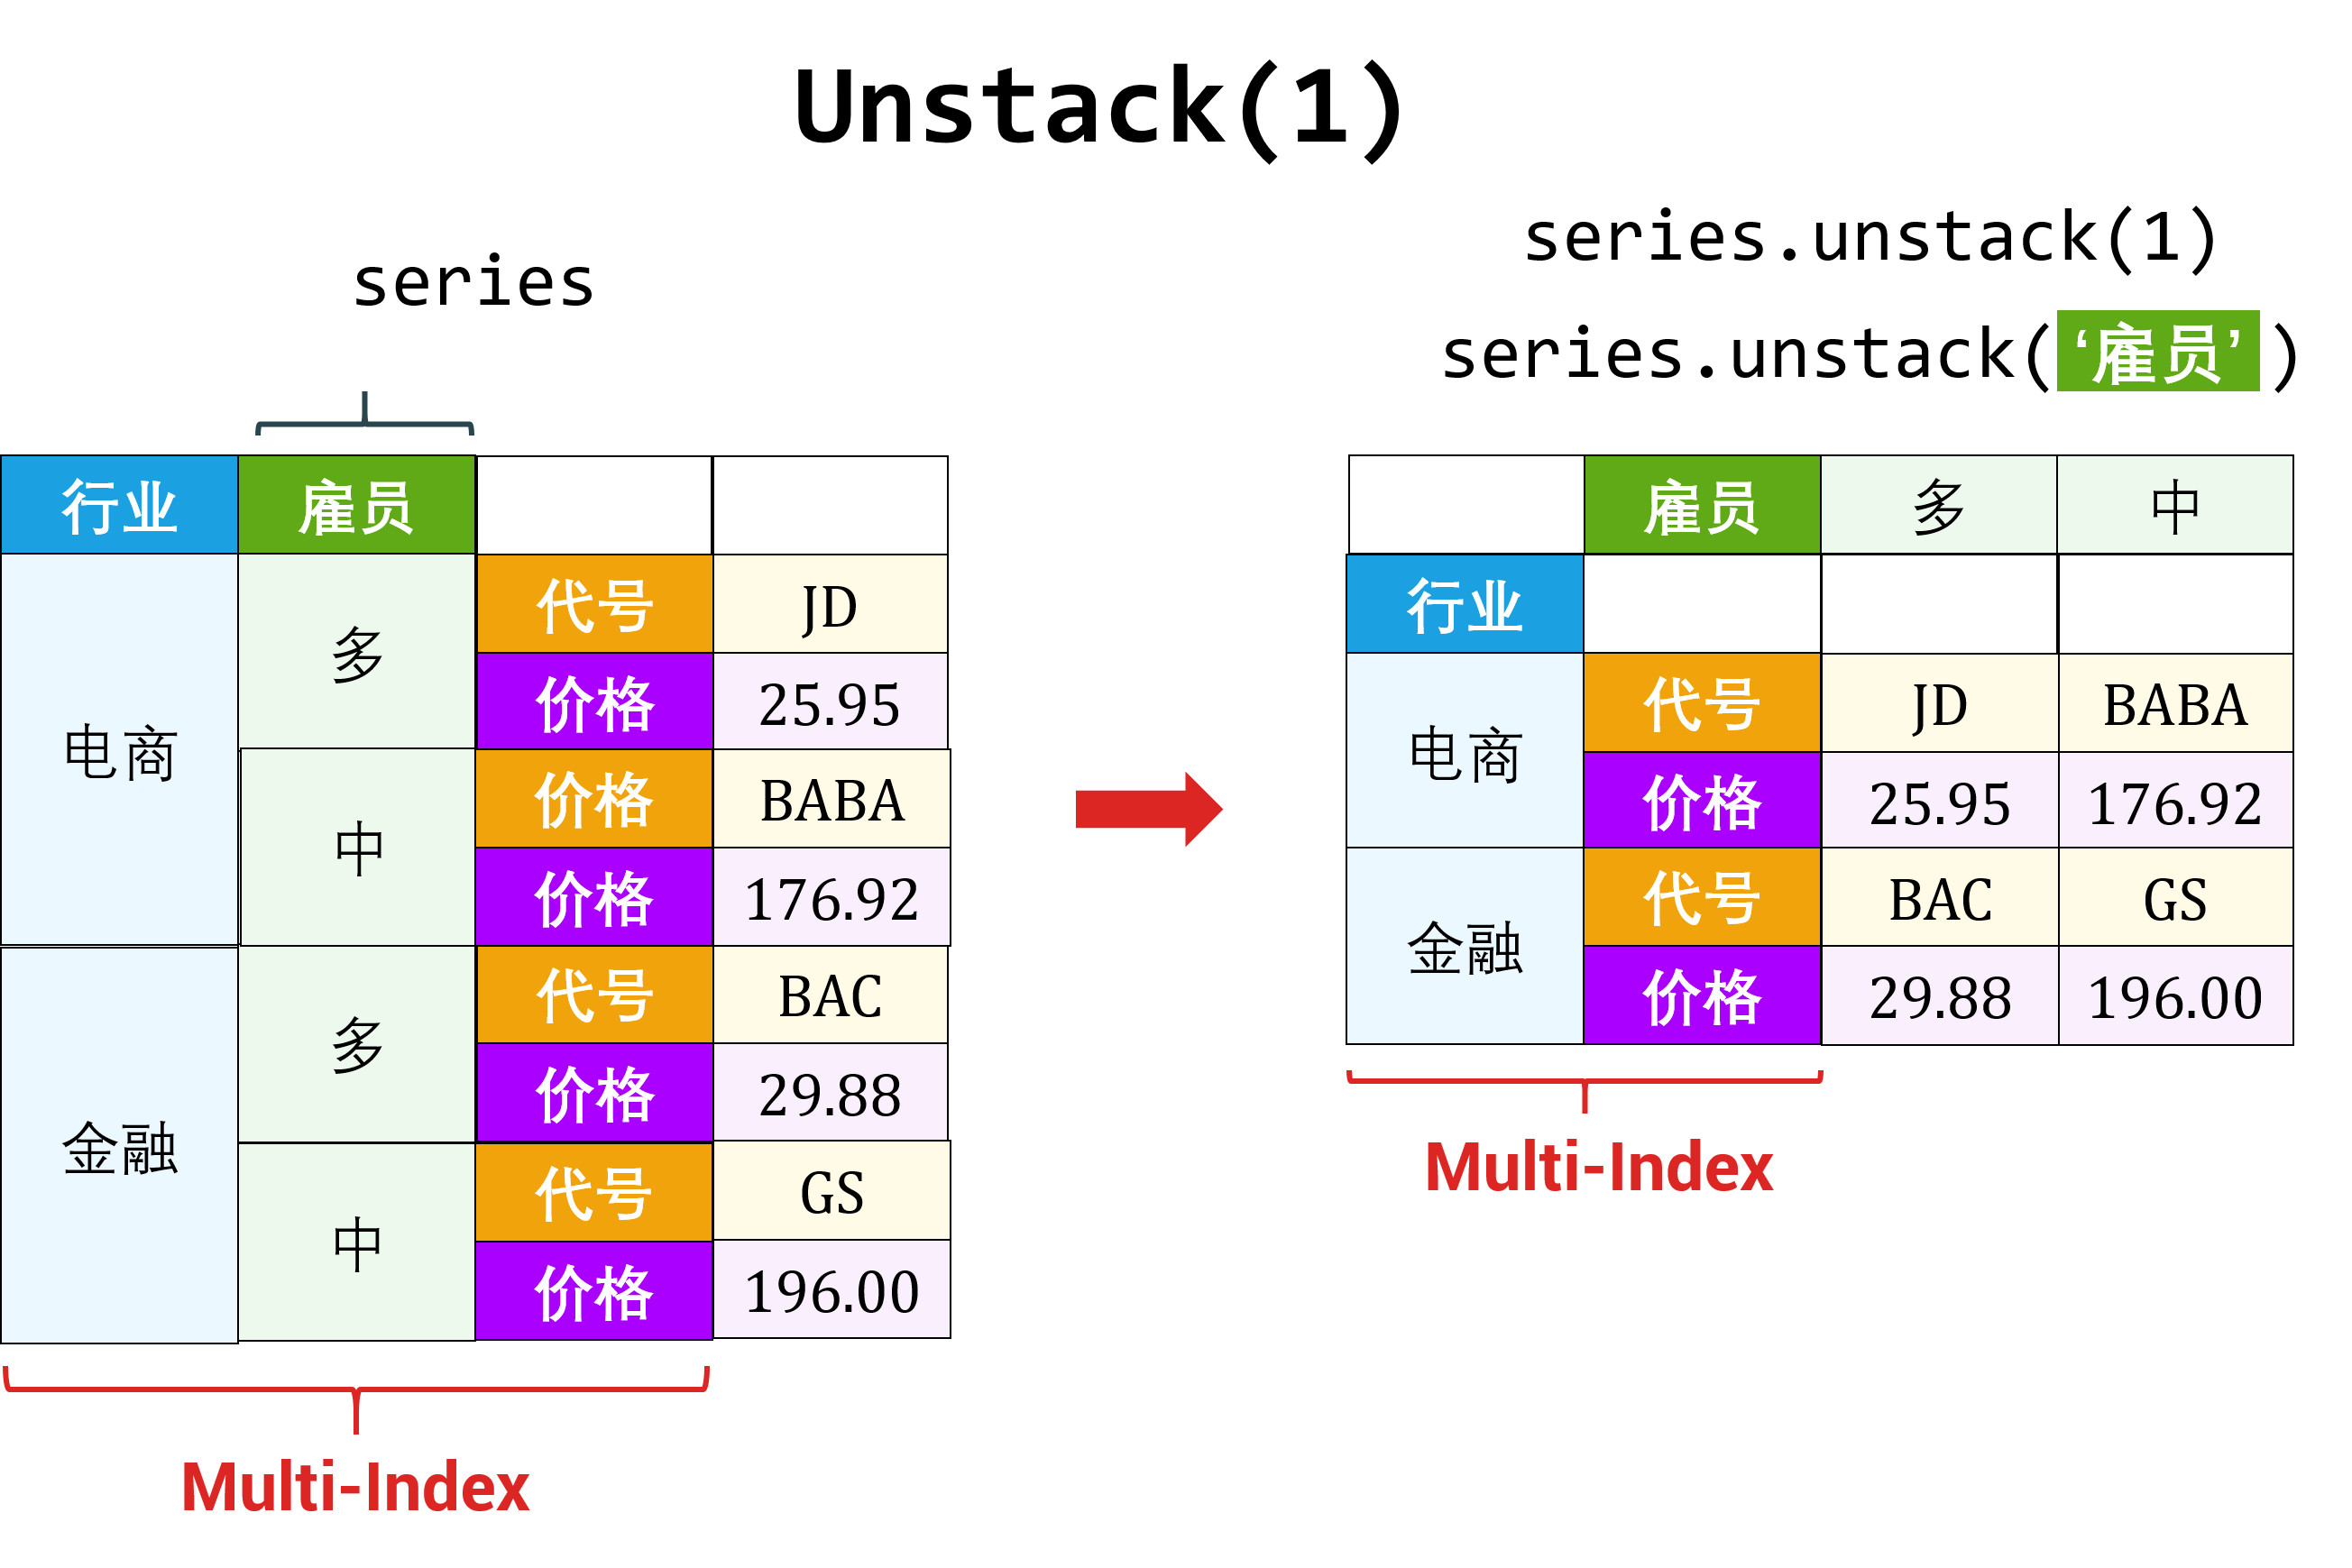

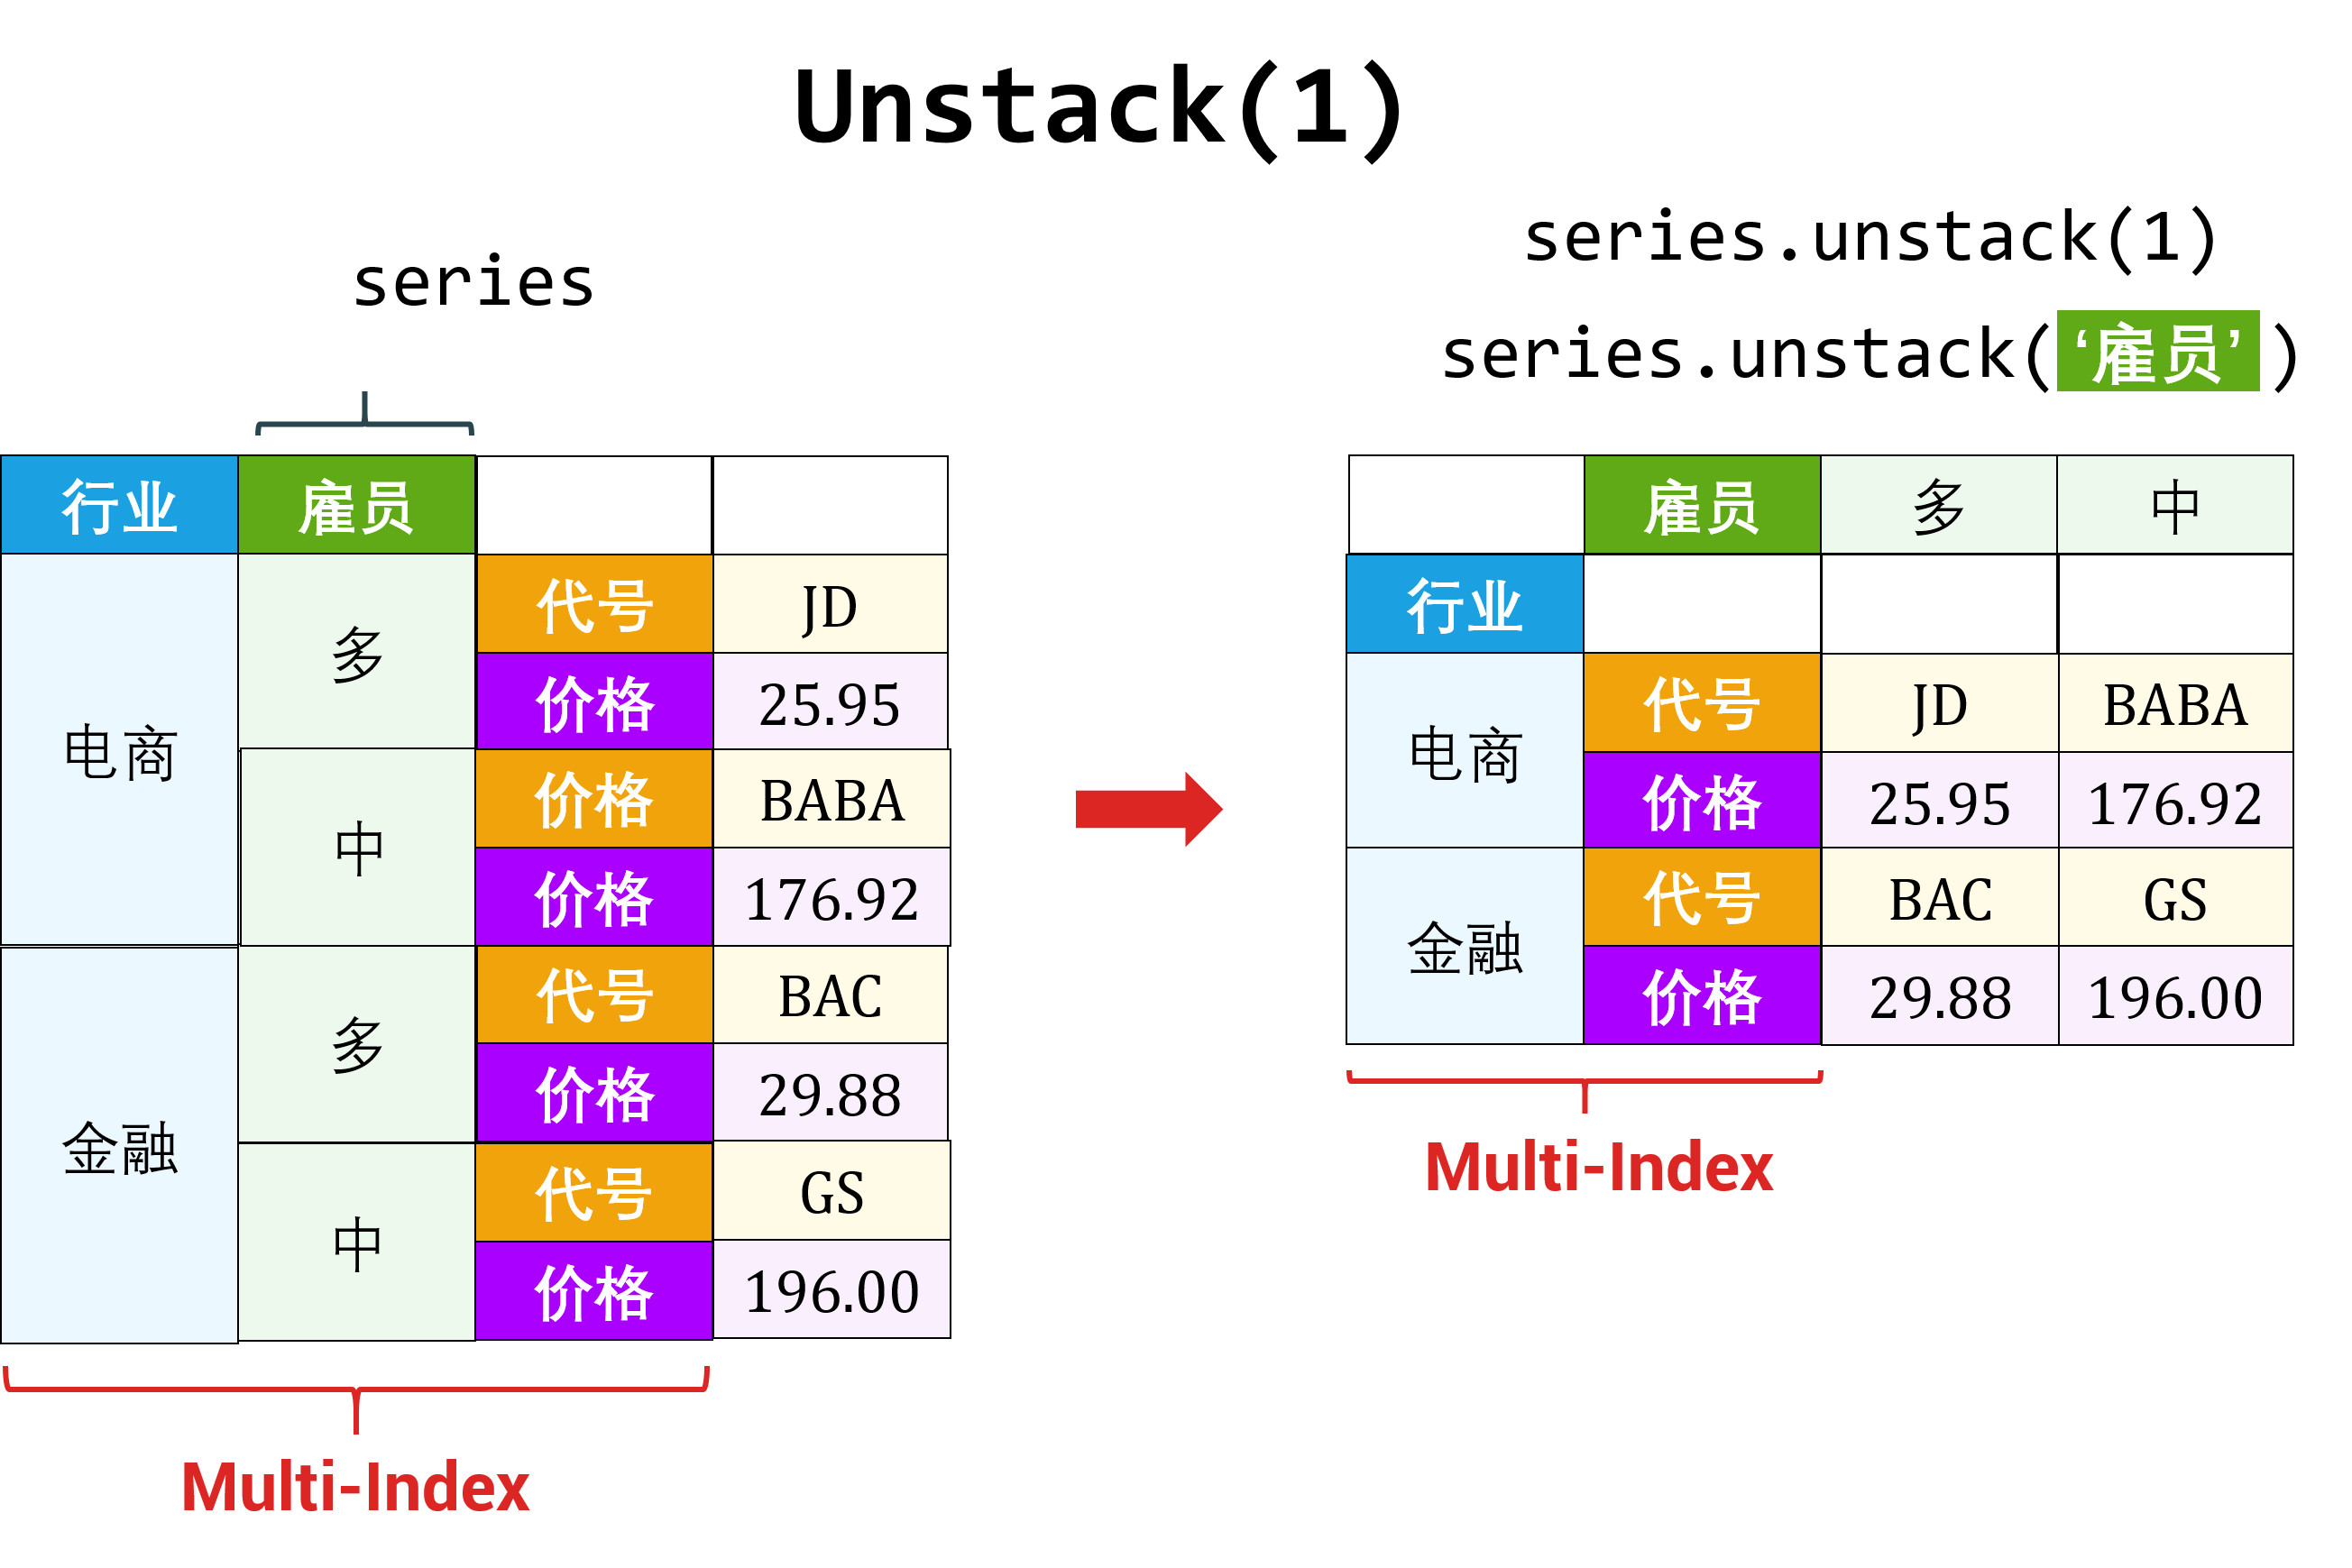

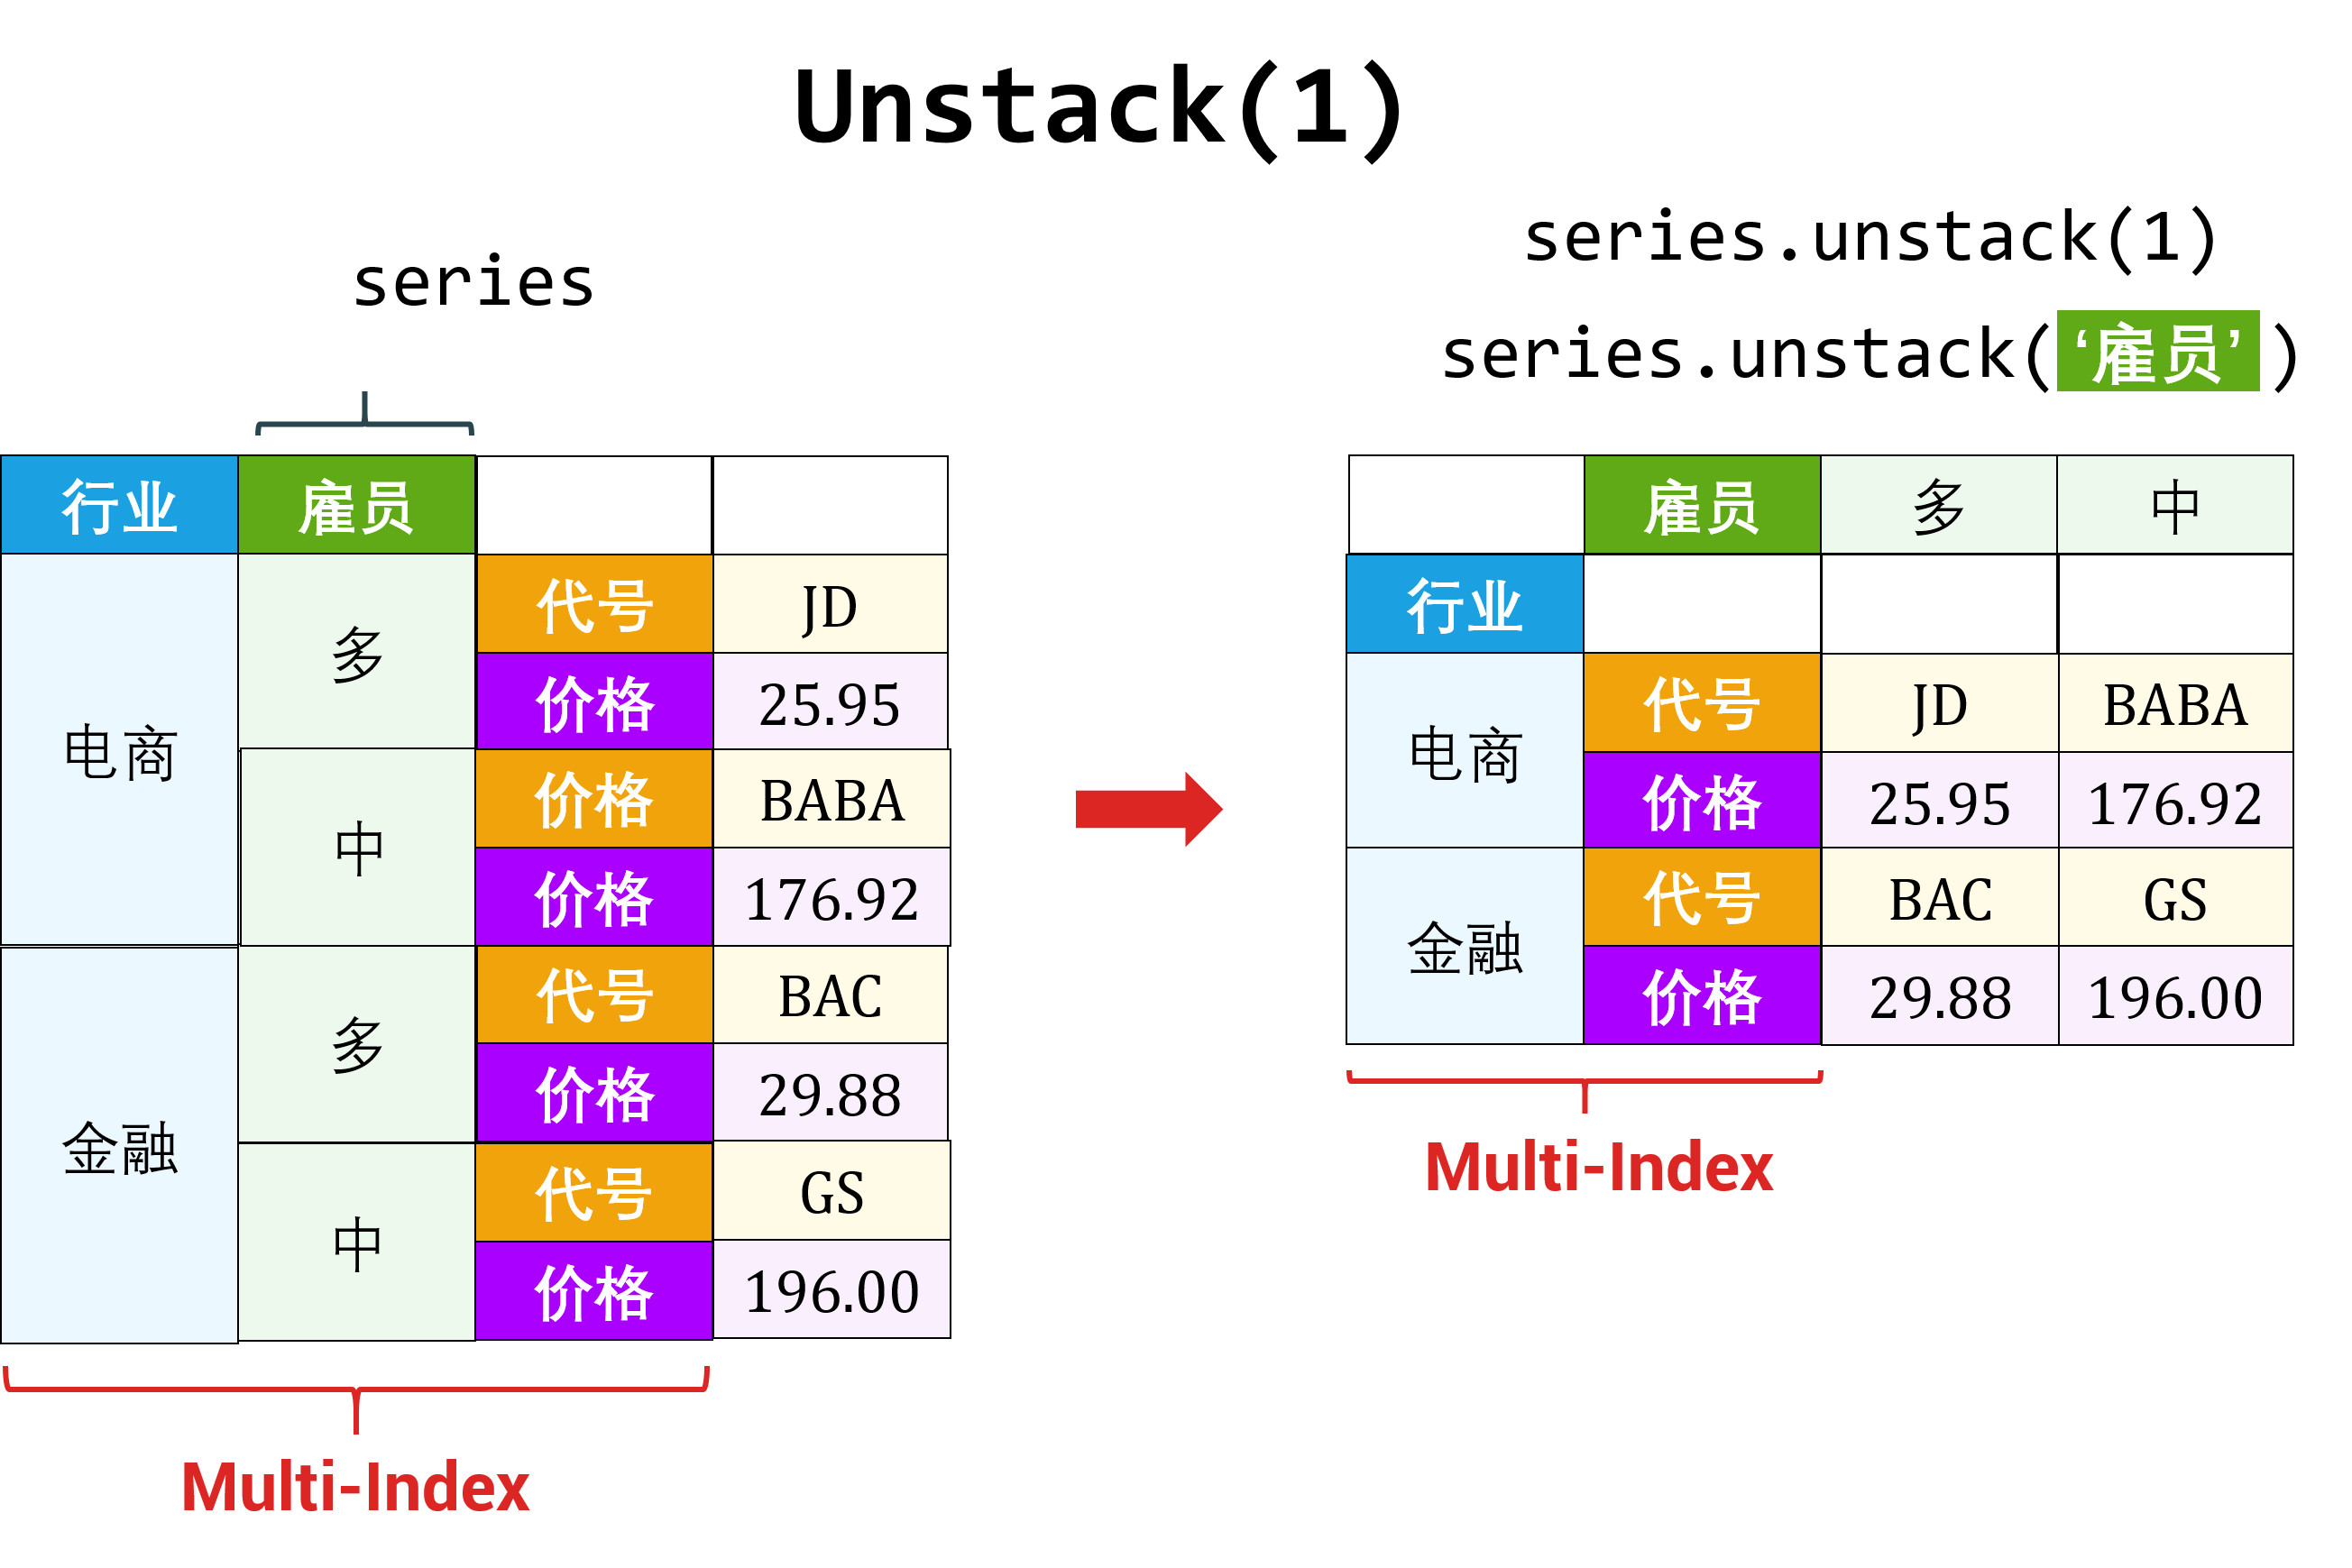

【透视数据表】用 pivot 函数将「一张长表」变成「多张宽表」，用 melt 函数将「多张宽表」变成「一张长表」。它们只是改变数据表的布局和展示方式而已。

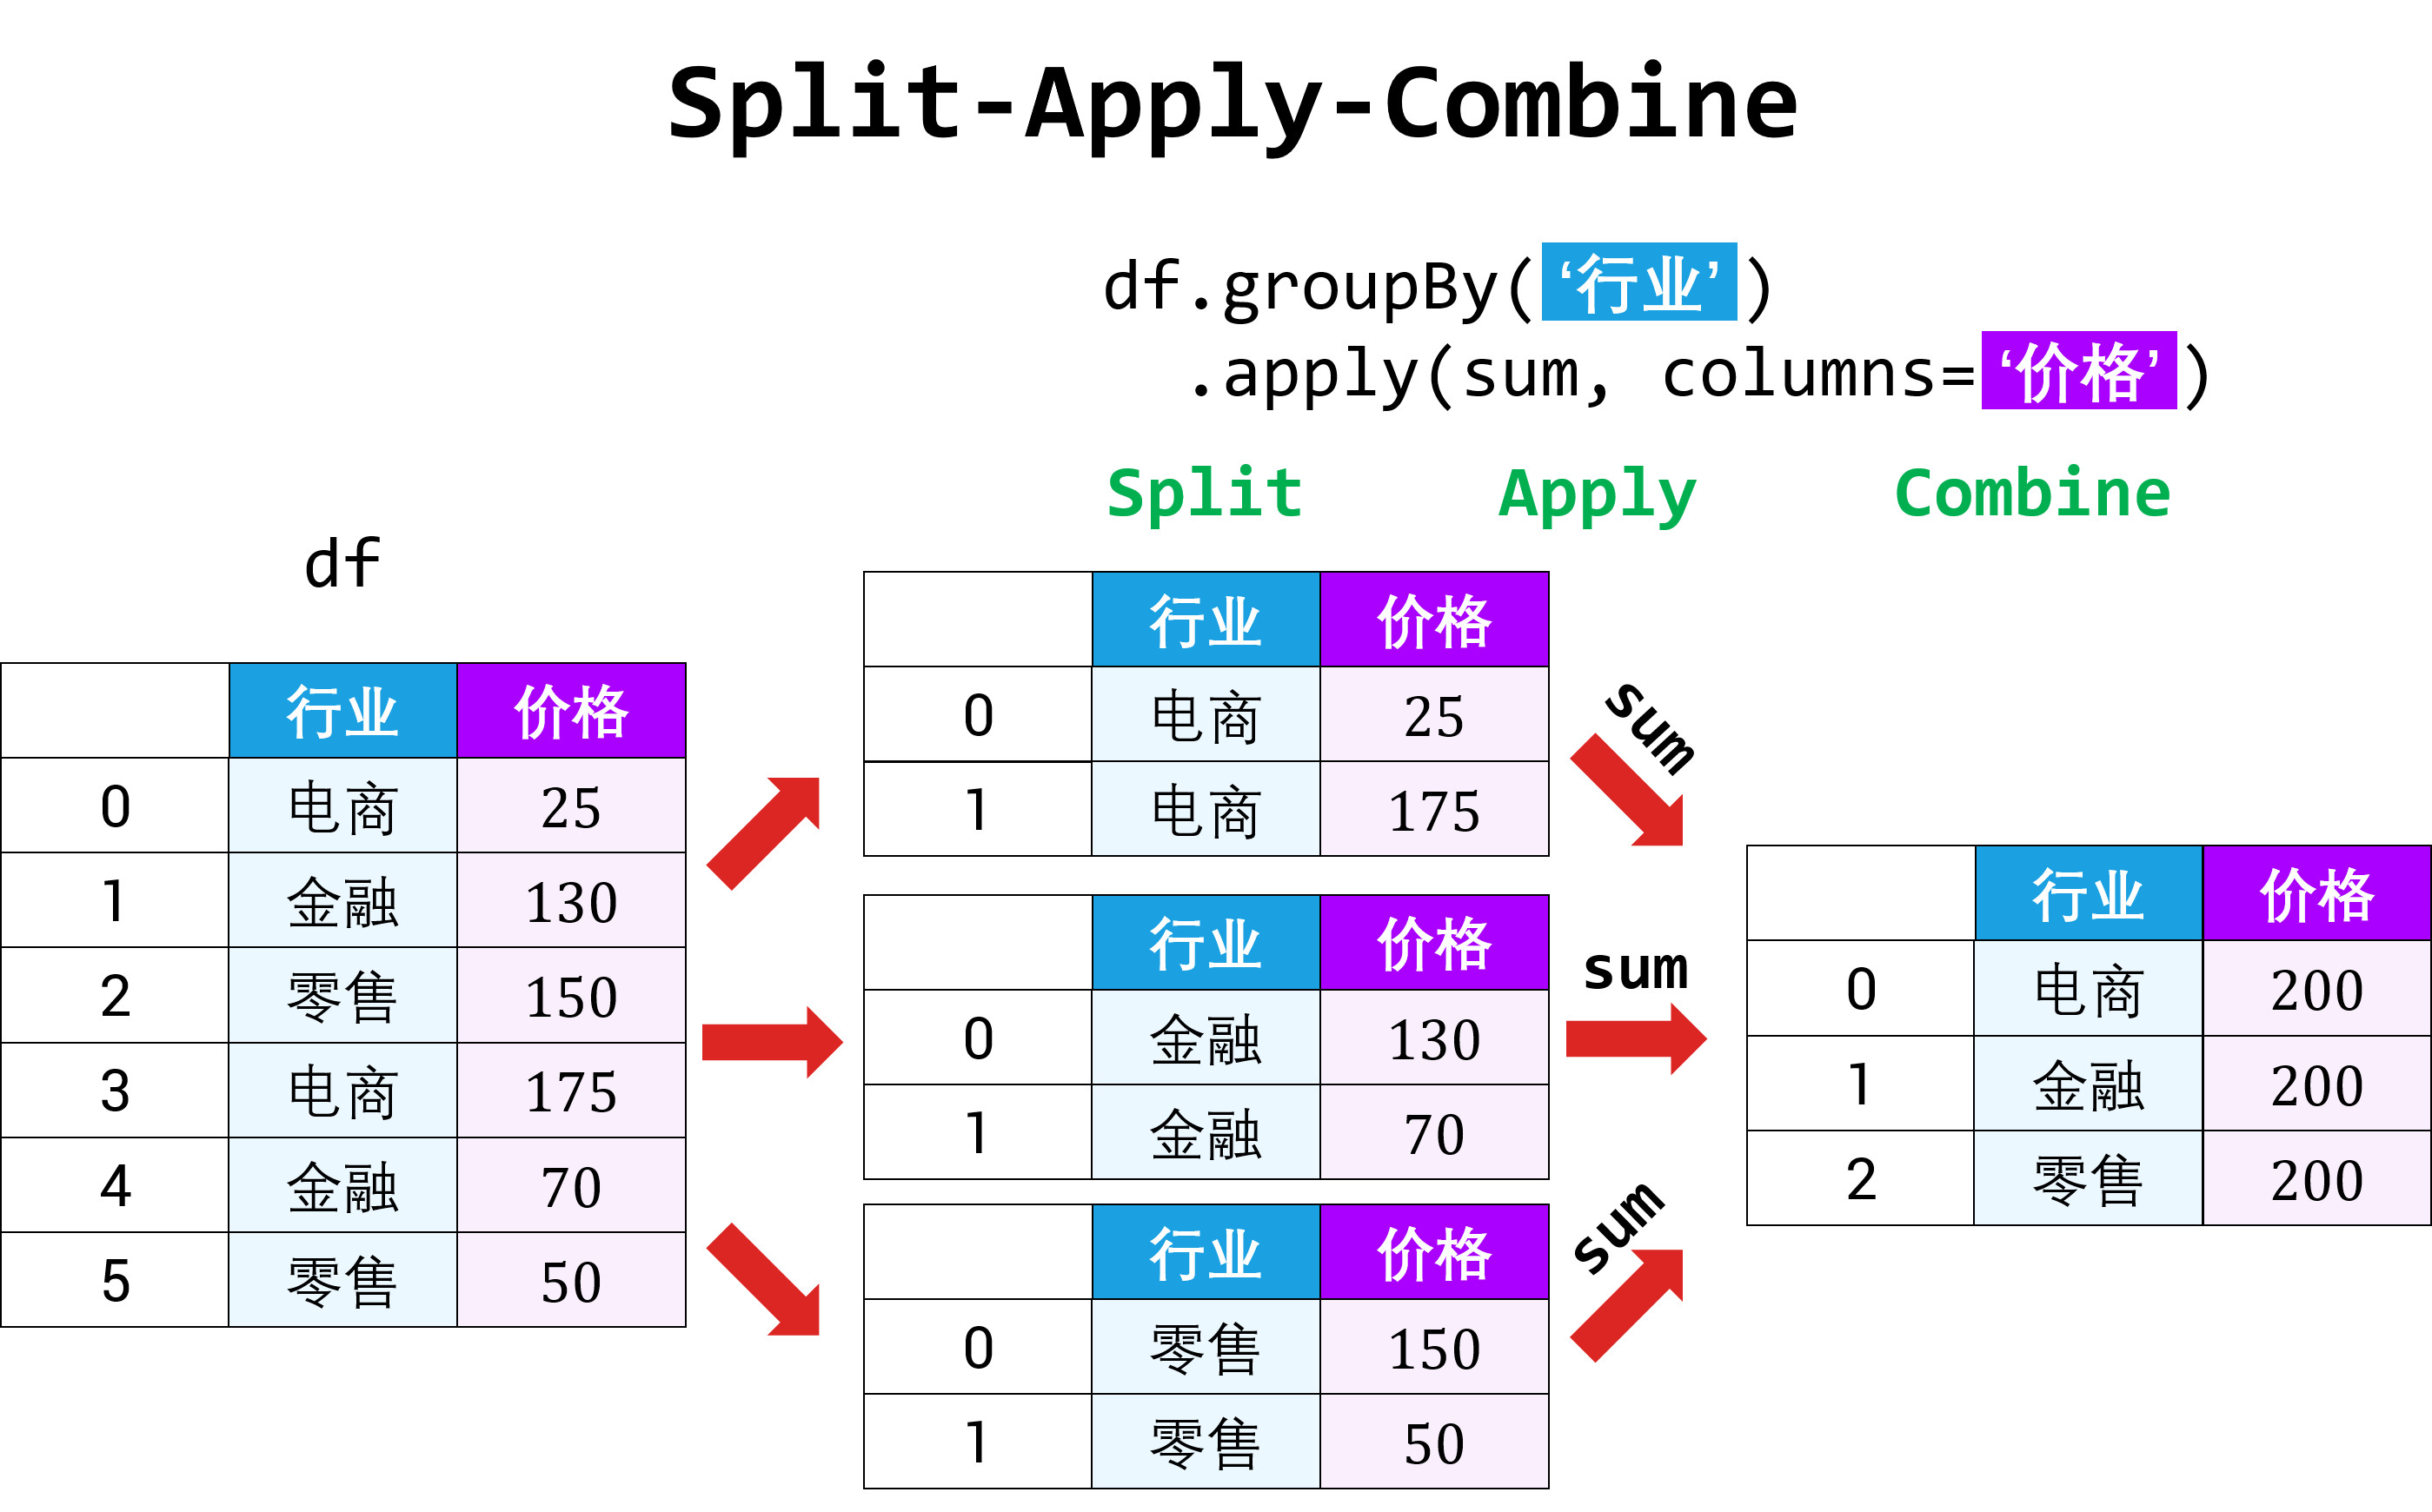

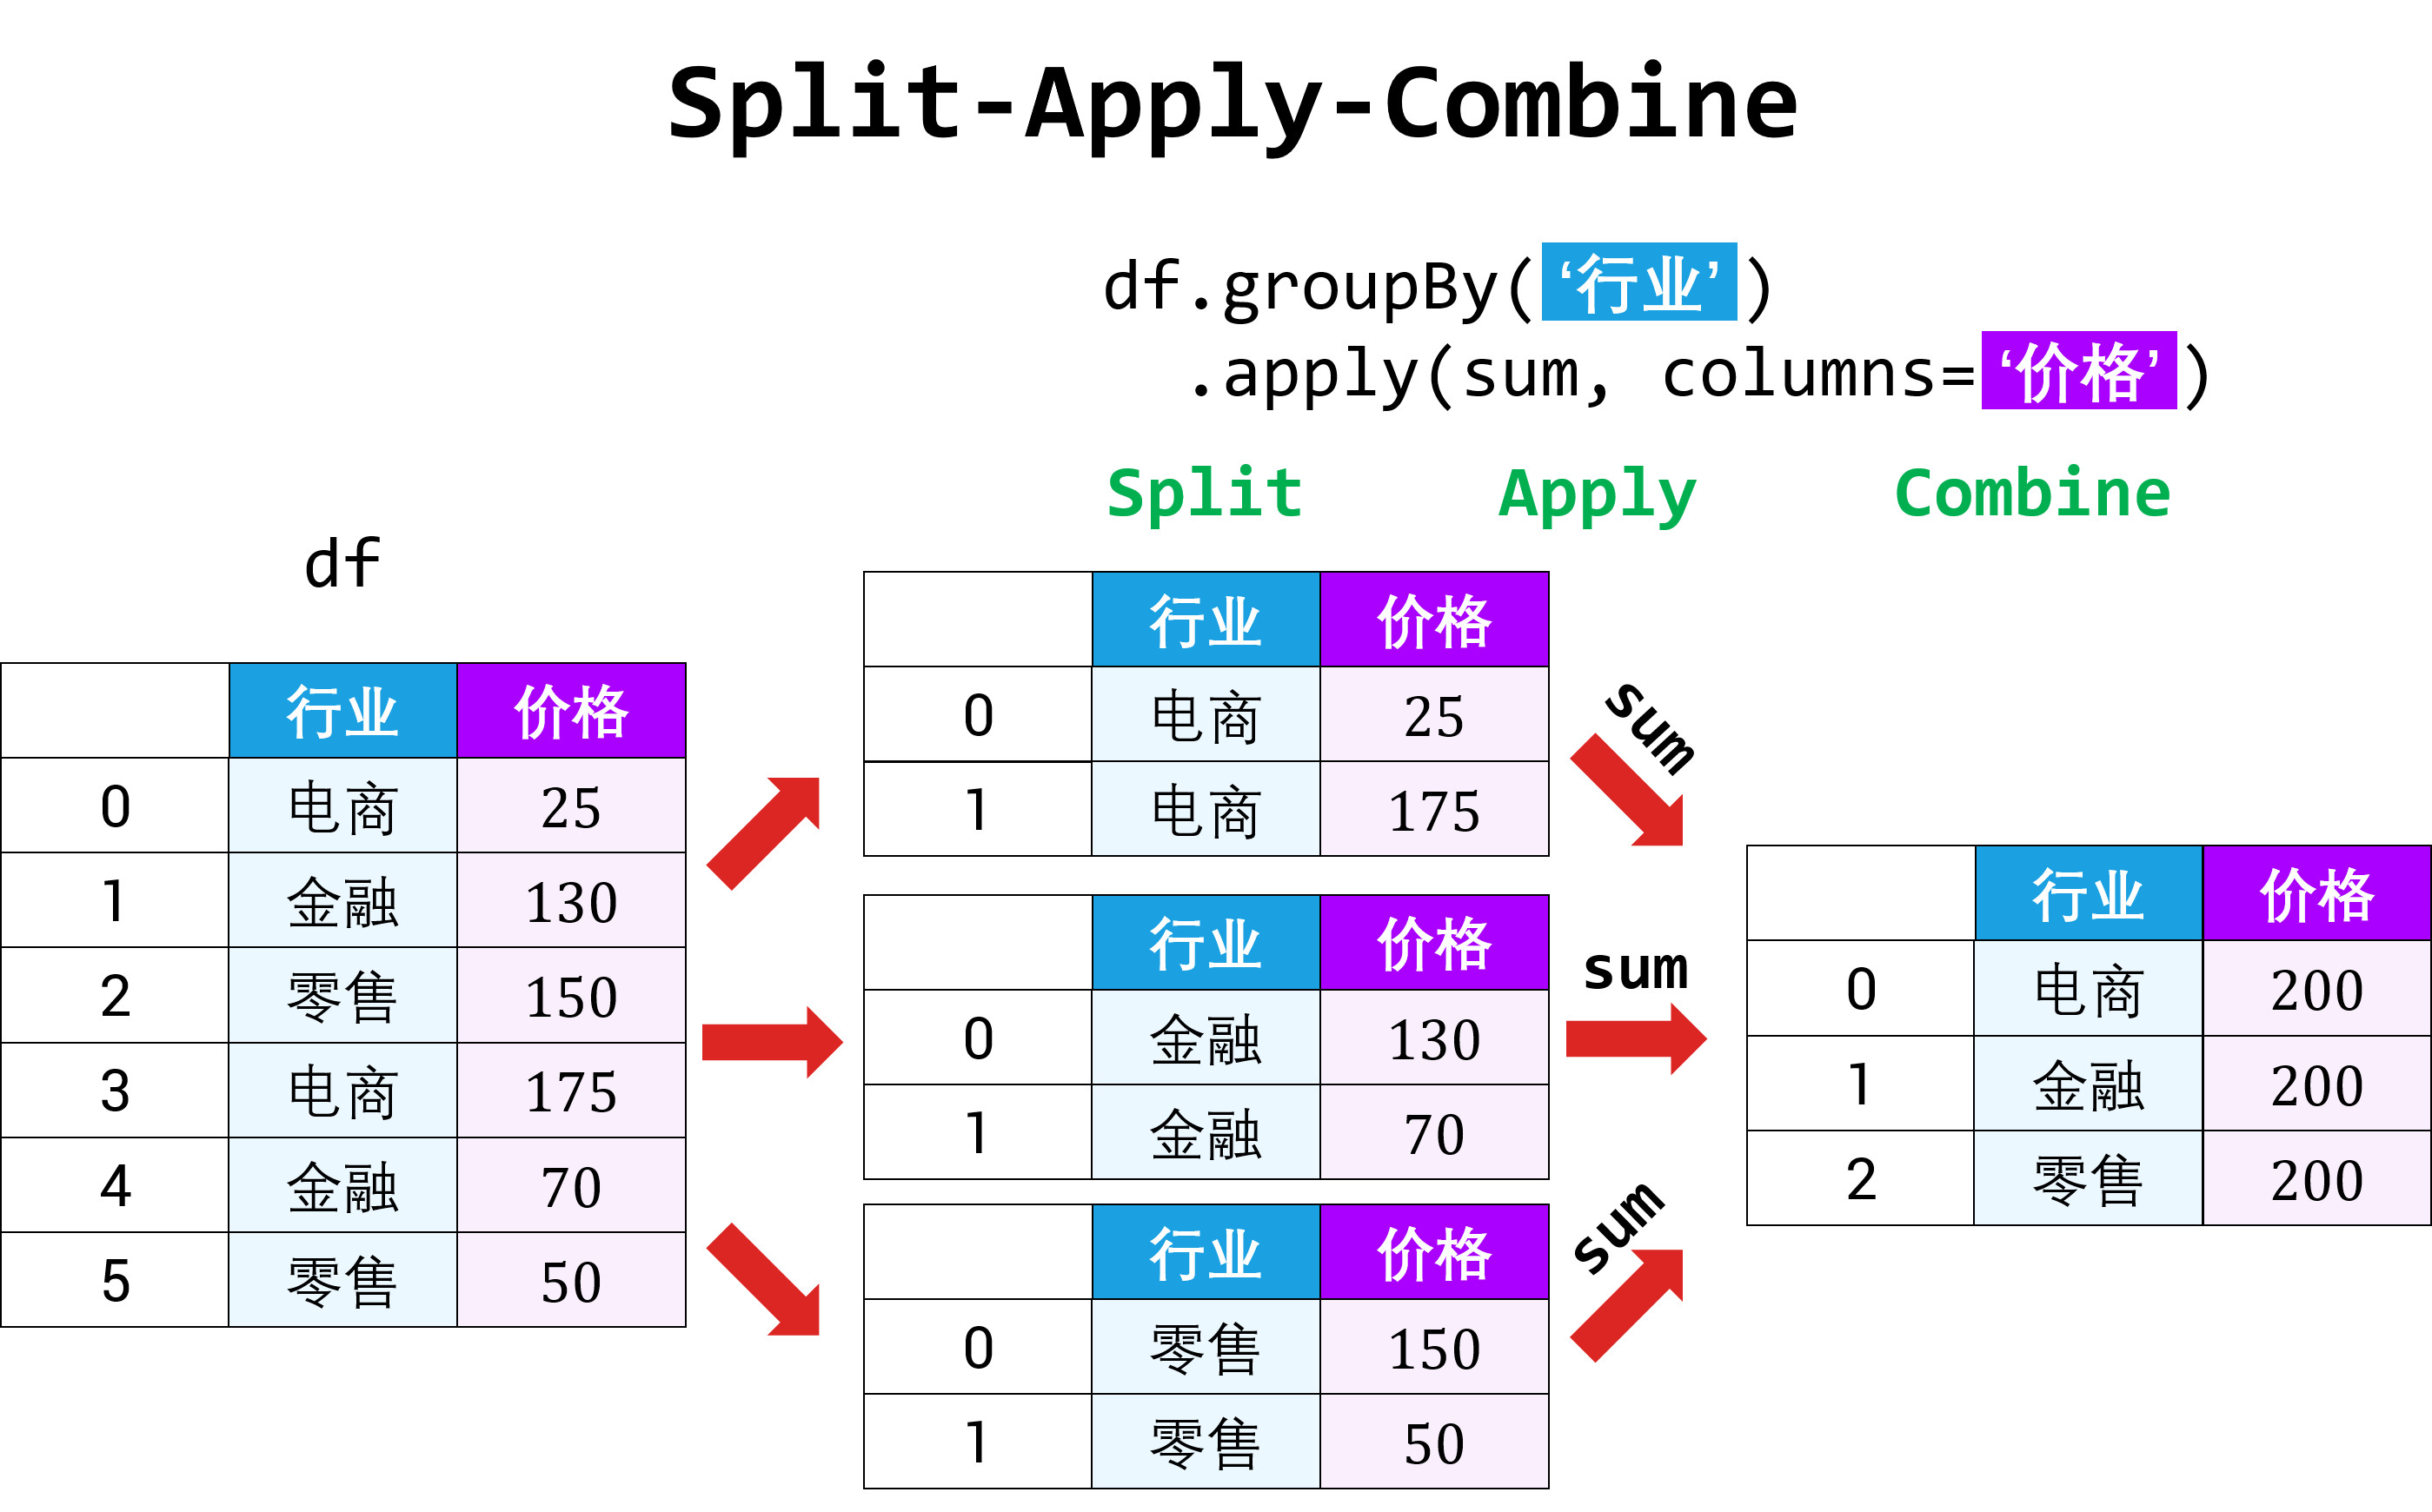

【分组数据表】用 groupBy 函数按不同「列索引」下的值分组。一个「列索引」或多个「列索引」就可以。

【整合数据表】用 agg 函数对每个组做整合而计算统计量。

【split-apply-combine】用 apply 函数做数据分析时美滋滋。

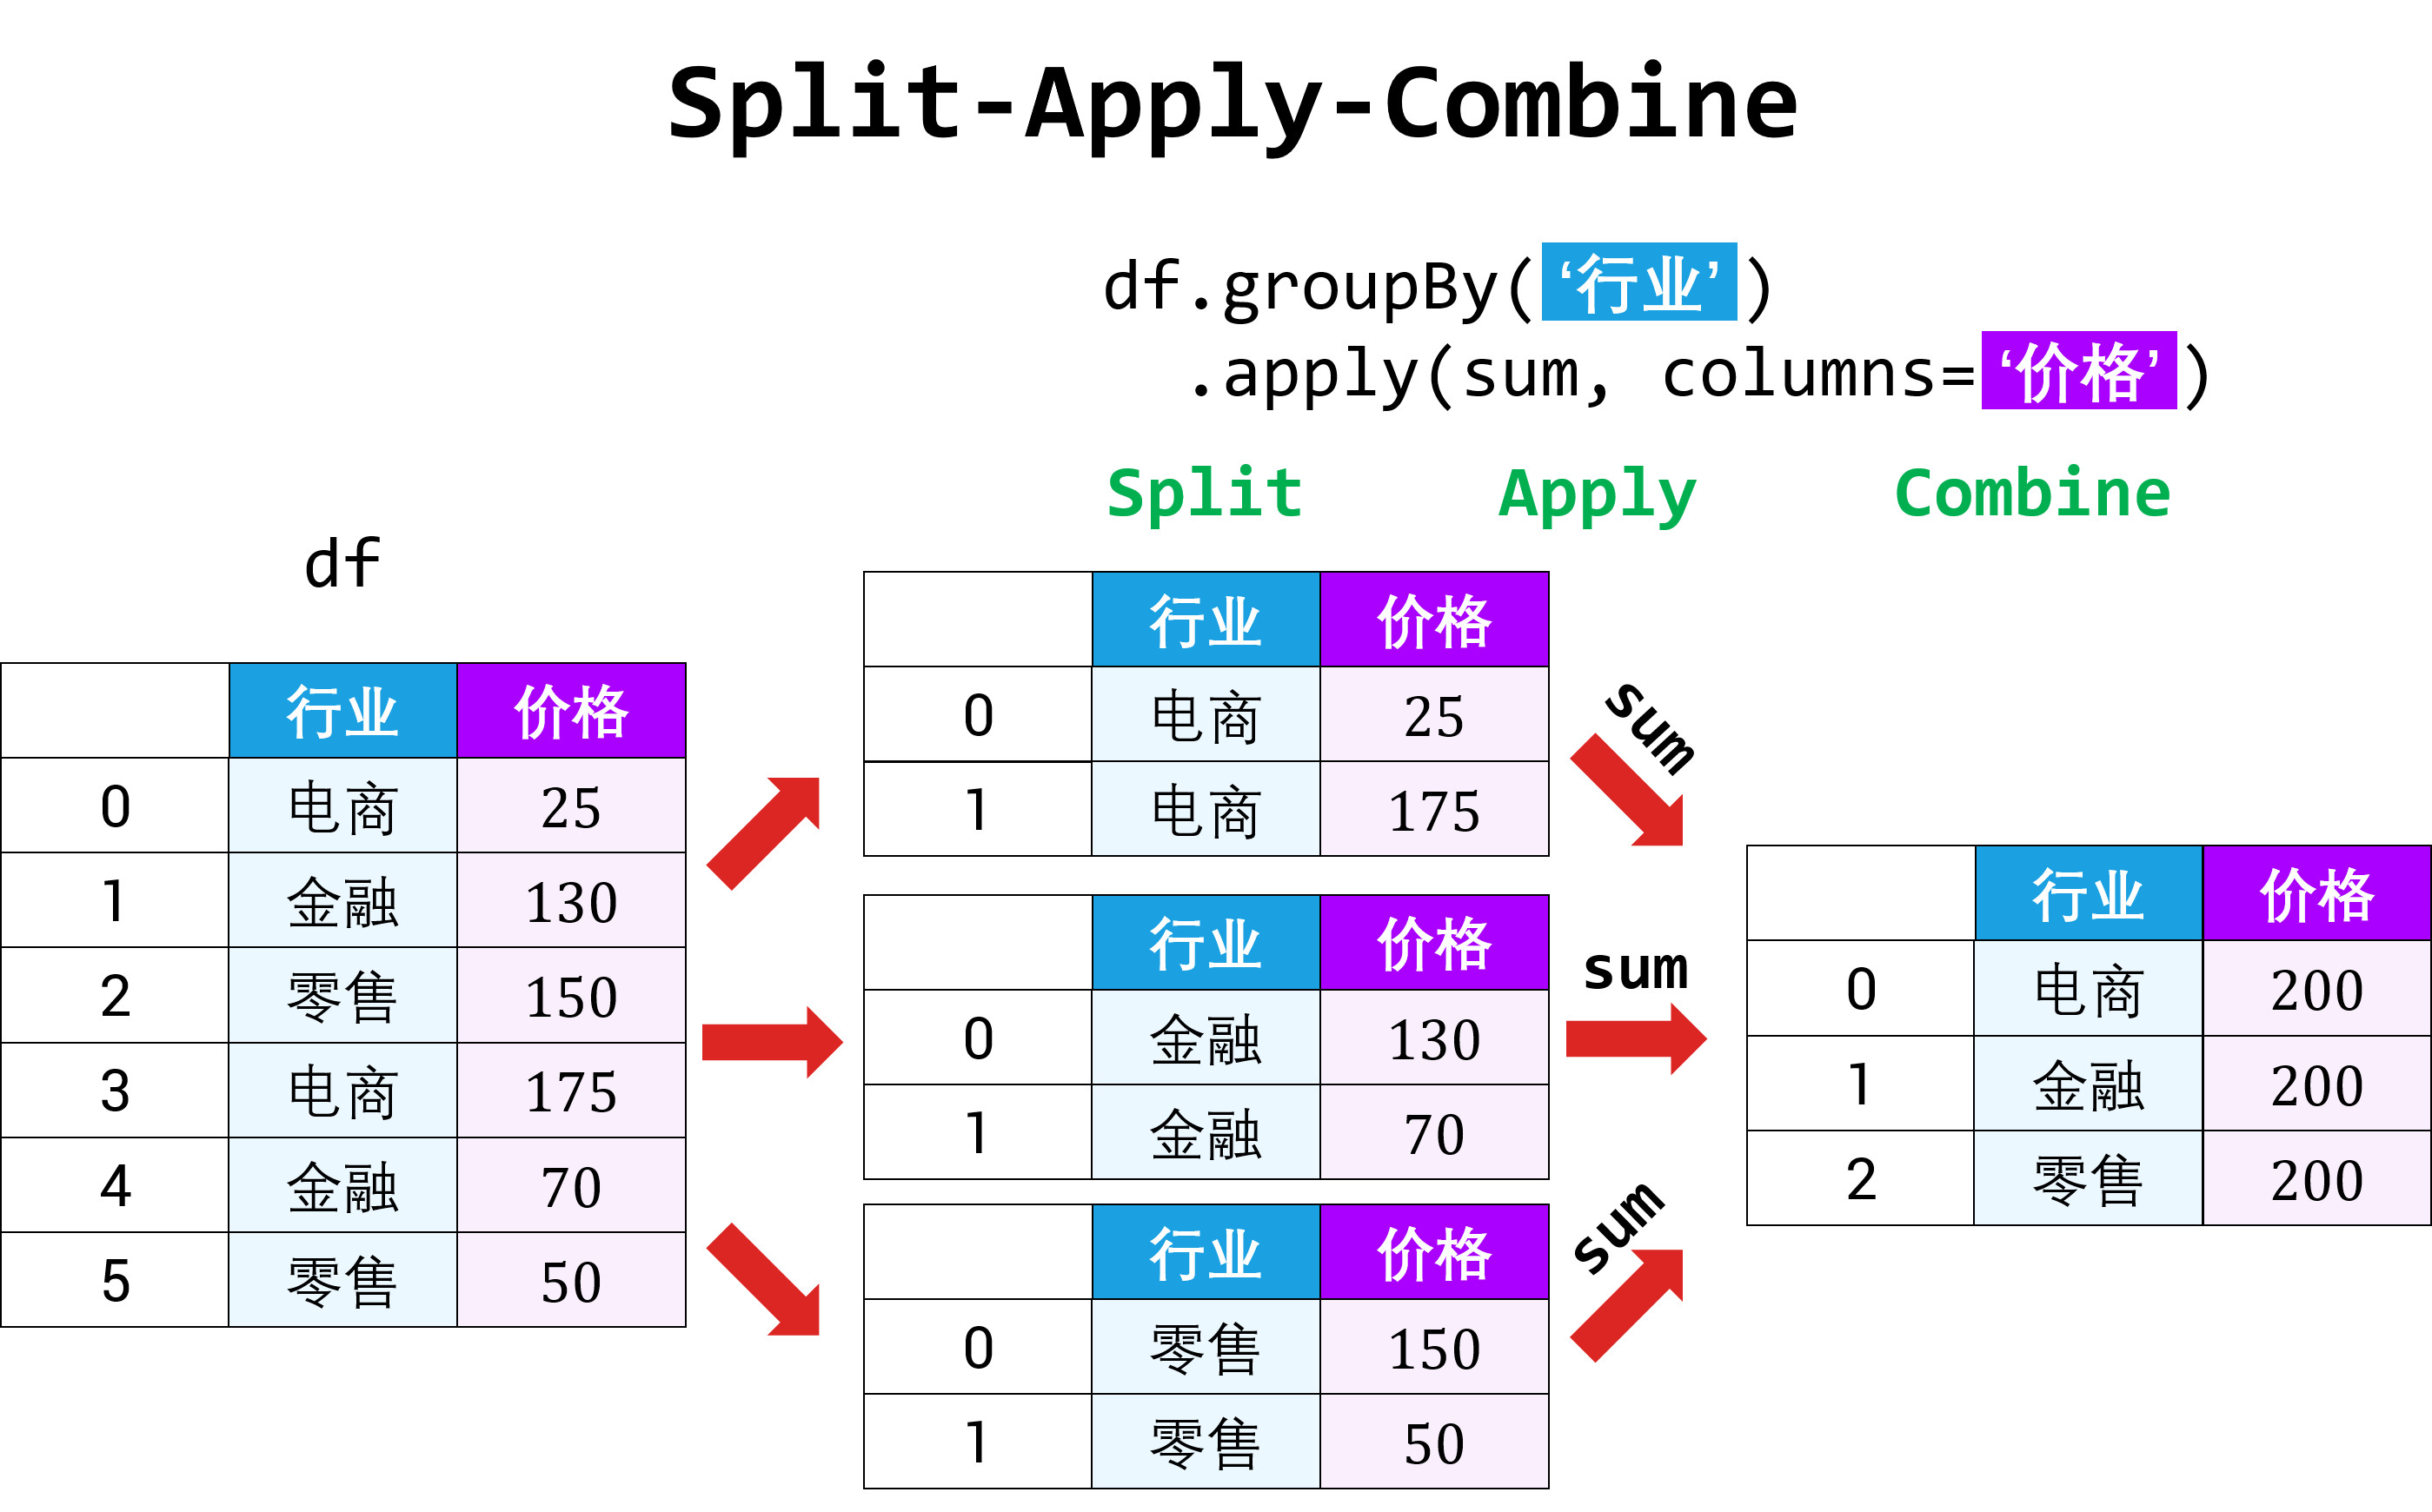

至此，我们已经打好 Python Basics 的基础，能用 NumPy 做数组计算，能用 SciPy 做插值、积分和优化 ，能用 Pandas 做数据分析 ，现在已经搞很多事情了。现在我们唯一欠缺的是如何画图或可视化数据，下帖从最基础的可视化工具 Matplotlib 开始讲。Stay Tuned!